<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Exploring-Data-and-Cleaning-if-necessary" data-toc-modified-id="Exploring-Data-and-Cleaning-if-necessary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring Data and Cleaning if necessary</a></span></li><li><span><a href="#Find-bangtan-and-solo" data-toc-modified-id="Find-bangtan-and-solo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find bangtan and solo</a></span></li><li><span><a href="#UDF-for-making-graphics" data-toc-modified-id="UDF-for-making-graphics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>UDF for making graphics</a></span></li><li><span><a href="#Streams-dynamic" data-toc-modified-id="Streams-dynamic-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Streams dynamic</a></span></li><li><span><a href="#Ranks-in-chart" data-toc-modified-id="Ranks-in-chart-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ranks in chart</a></span></li><li><span><a href="#Days-on-chart" data-toc-modified-id="Days-on-chart-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Days on chart</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Intro

<hr>

<br>

The main aim of this project is to analyze Daily Top Songs chart for Kazakhstan in August 2024 and find correlations in streaming habits of users and chart positions.

<br>

For this analysis we'll pay attention to songs by several BTS members including:

 - Jimin's *"Who", "Be Mine", "Smeraldo Garden Marching Band"*,
 
 - V's *"Love Me Again", "FRI(END)s"*, 
 
 - JungKook's *"Seven", "Standing Next to You"* and some more.
 
<hr>

First, we will load data from Spotify Charts and explore it. Then we will find artists and songs for this analysis to learn more about streaming habits of ARMYs who are using KZ Spotify accounts.

## Exploring Data and Cleaning if necessary

In [81]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
plt.style.use('ggplot')
sns.set_style ("darkgrid")
sns.color_palette("Paired")

import warnings
warnings.filterwarnings("ignore")

In [27]:
# reading file with Daily Top Chart from 01 Aug 24 - 31 Aug 2024

dtc = pd.read_csv('kz spotify daily/DailyTopKz_Aug24.csv', encoding='UTF8', index_col=None)

In [28]:
dtc.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,dt
0,1,spotify:track:7tI8dRuH2Yc6RuoTjxo4dU,Jimin,Who,BIGHIT MUSIC,1,1,14,34758,2024-08-01
1,2,spotify:track:3T5Bg6yis8bTyIk8o1nxjf,Irina Kairatovna,Айдахар,ГОСТ,1,2,56,13424,2024-08-01
2,3,spotify:track:3qPi9H4HOdYIl9Lr4WPLJU,Bakr,Очи,Infinity Music,2,3,813,11692,2024-08-01
3,4,spotify:track:3E7pXPvfPnueoZKz4VTg1n,"Big Baby Tape, Aarne, Toxi$",Ameli,BENZO RECORDS,4,4,32,10453,2024-08-01
4,5,spotify:track:2N0SPREDYqILVEFSsWF5N5,V,Love Me Again,BIGHIT MUSIC,5,13,127,10424,2024-08-01


In [29]:
# getting info about df

dtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           6200 non-null   int64 
 1   uri            6200 non-null   object
 2   artist_names   6200 non-null   object
 3   track_name     6200 non-null   object
 4   source         6200 non-null   object
 5   peak_rank      6200 non-null   int64 
 6   previous_rank  6200 non-null   int64 
 7   days_on_chart  6200 non-null   int64 
 8   streams        6200 non-null   int64 
 9   dt             6200 non-null   object
dtypes: int64(5), object(5)
memory usage: 484.5+ KB


We can see there are no null values.

The columns are:

 - rank: song rank in Top Daily Chart on chosen day (200 ranks per day)
 
 - uri: song id
 
 - artist name(s)
 
 - track name
 
 - source: production company
 
 - peak_rank: the highest rank this entry has ever reached on that chart
 
 - previous_rank: rank the day before
 
 - days_on_chart: total number of consecutive days this entry has spent in that chart
 
 - daily stream count
 
 - dt: date of the chart

In [37]:
# Let's see how many unique entries there are throughout the month
print('Count of unique songs that entered Daily Chart in august: ', dtc['uri'].nunique())

# count of artists in the chart
print('Count of unique artists names: ', dtc['artist_names'].nunique())

# min value of streams
print('Song with min streams that made an entry on the chart in august: ', min(dtc['streams']))

# max value of streams
print('Max streams on the chart in august: ', dtc['streams'].max())

# max days on chart for a song throughout august
print('Max consecutive days on chart appeared in chart: ', dtc['days_on_chart'].max())

Count of unique songs that entered Daily Chart in august:  310
Count of unique artists names:  212
Song with min streams that made an entry on the chart in august:  2514
Max streams on the chart in august:  69429
Max consecutive days on chart appeared in chart:  924


In [41]:
# the song with max daily streams in August in KZ! ^^
dtc.loc[dtc['streams']==max(dtc['streams'])]

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,dt
200,1,spotify:track:7tI8dRuH2Yc6RuoTjxo4dU,Jimin,Who,BIGHIT MUSIC,1,1,15,69429,2024-08-02


<hr>

## Find bangtan and solo

Let's see how many songs by BTS and members have made it to chart in august.

In [55]:
dtc[['artist_names', 'track_name']].loc[(dtc['artist_names'].str.contains('BTS')) |
                                       (dtc['artist_names'].str.contains('Jimin')) |
                                       (dtc['artist_names'].str.contains('Jung Kook')) |
                                       (dtc['artist_names'].str.contains('RM')) |
                                       (dtc['artist_names'].str.contains('Agust D')) |
                                       (dtc['artist_names'].str.contains('Jin')) |
                                       (dtc['artist_names'].str.contains('j-hope')) |
                                       (dtc['artist_names']==('V'))].drop_duplicates()

,artist_names,track_name
0,Jimin,Who
4,V,Love Me Again
24,Jimin,Be Mine
30,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.)
40,"Jimin, Loco",Smeraldo Garden Marching Band (feat. Loco)
48,V,FRI(END)S
123,Jung Kook,Standing Next to You
976,"Jung Kook, Jack Harlow",3D (feat. Jack Harlow)
2528,Agust D,Haegeum
2565,RM,LOST!


Twelve songs made it to KZ Daily Top Songs Chart :)

In [56]:
# putting it in a df
bts = dtc.loc[(dtc['artist_names'].str.contains('BTS')) |
                                       (dtc['artist_names'].str.contains('Jimin')) |
                                       (dtc['artist_names'].str.contains('Jung Kook')) |
                                       (dtc['artist_names'].str.contains('RM')) |
                                       (dtc['artist_names'].str.contains('Agust D')) |
                                       (dtc['artist_names'].str.contains('Jin')) |
                                       (dtc['artist_names'].str.contains('j-hope')) |
                                       (dtc['artist_names']==('V'))]

## UDF for making graphics

In [117]:
# creating a udf for dynamic of streams in august

def stream_dynamic(data):
    plt.figure(figsize=(17, 10))
    ax = sns.lineplot(data=data, x='dt', y='streams', hue='track_name')
    ax.set_xticks(ax.get_xticks()[::7])
    plt.title('Streams count in August 2024')
    return plt.show()

In [122]:
def avg_streams_dow(data):
    data['day_of_week'] = pd.to_datetime(data['dt']).dt.day_name()
    agg = data.groupby(['day_of_week', 'track_name']).agg({'streams':'mean'})\
                                  .reset_index()\
                                  .rename(columns={'streams':'average_streams_ct'})
    m = max(agg['average_streams_ct'])
    plt.figure(figsize=(17, 10))
    sns.pointplot(data = agg
                      , x='day_of_week', y='average_streams_ct', hue='track_name', order=["Monday", "Tuesday", "Wednesday",
                                                                                         "Thursday", "Friday", "Saturday",
                                                                                         "Sunday"])
    plt.title('Average streams count by weekdays (Kazakhstan Daily Top Songs Chart)')
    plt.ylim(0,m+1000)
    return plt.show()

## Streams dynamic 

"Muse" was released on the 19th of July and pre-released track 'Smeraldo Garden Marching Band' was released on the 28th of June 2024.


As it's one of the newest releases we will analyse it first.

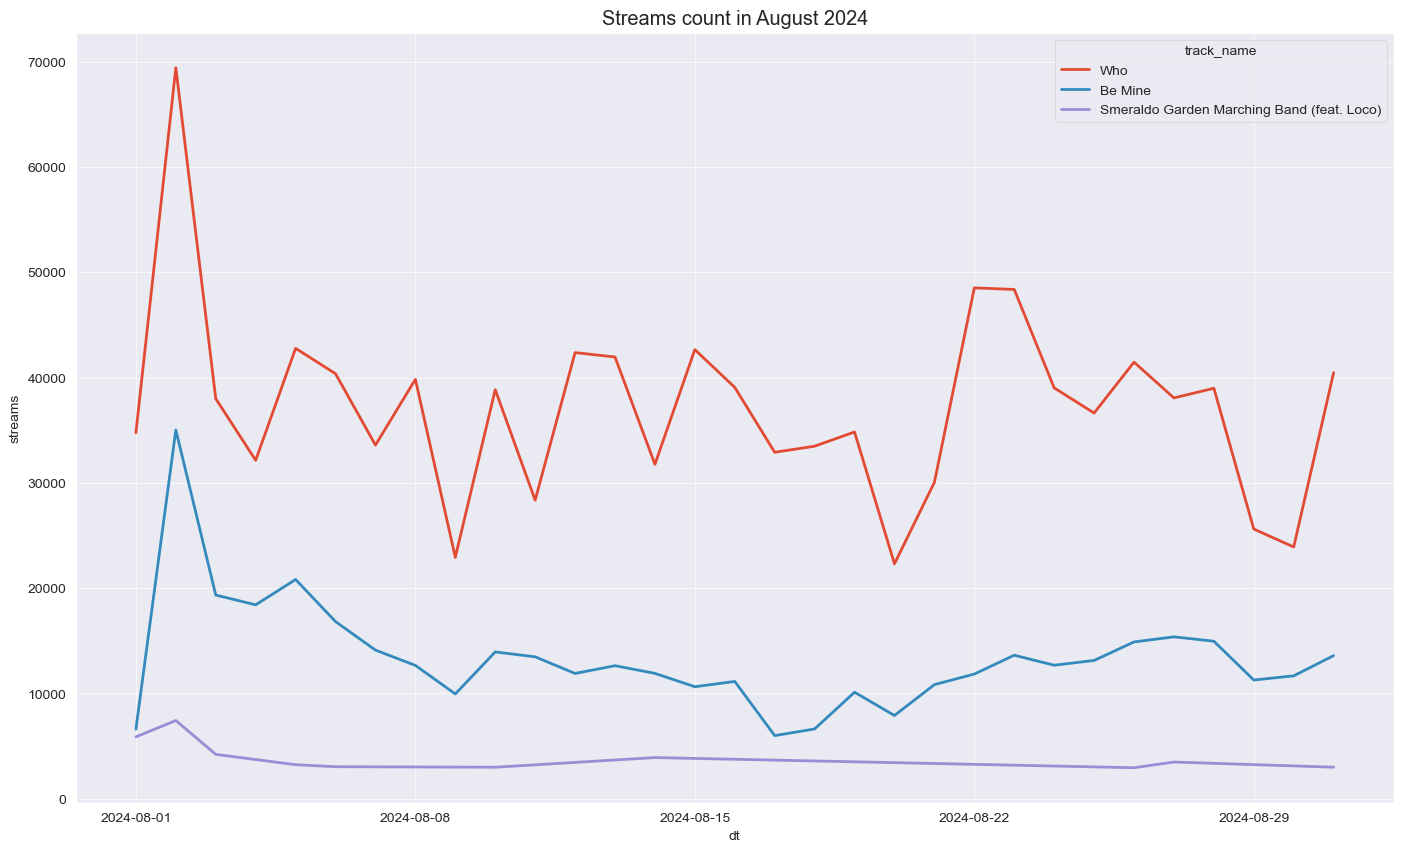

In [119]:
stream_dynamic(bts.loc[dtc['artist_names'].str.contains('Jimin')])

As expected title track "Who" is gainig much more streams than b-side tracks "Be Mine" and "Smeraldo Garden Marching Band".

<hr>

Next let's see if there is a correlation between day of the week and the average streams count.

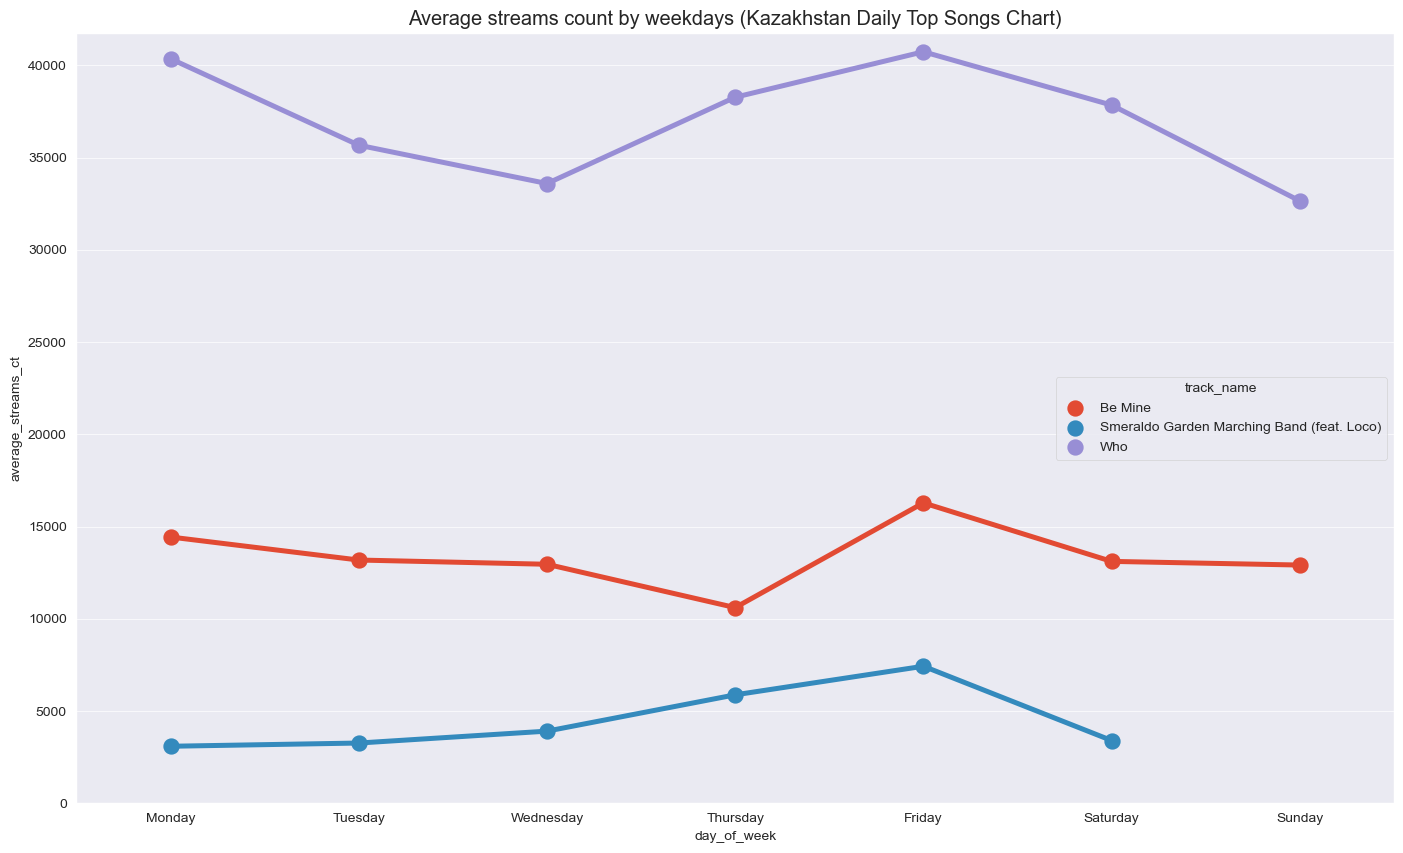

In [123]:
avg_streams_dow(bts.loc[dtc['artist_names'].str.contains('Jimin')])

Looks like streams count usually drop during weekends.

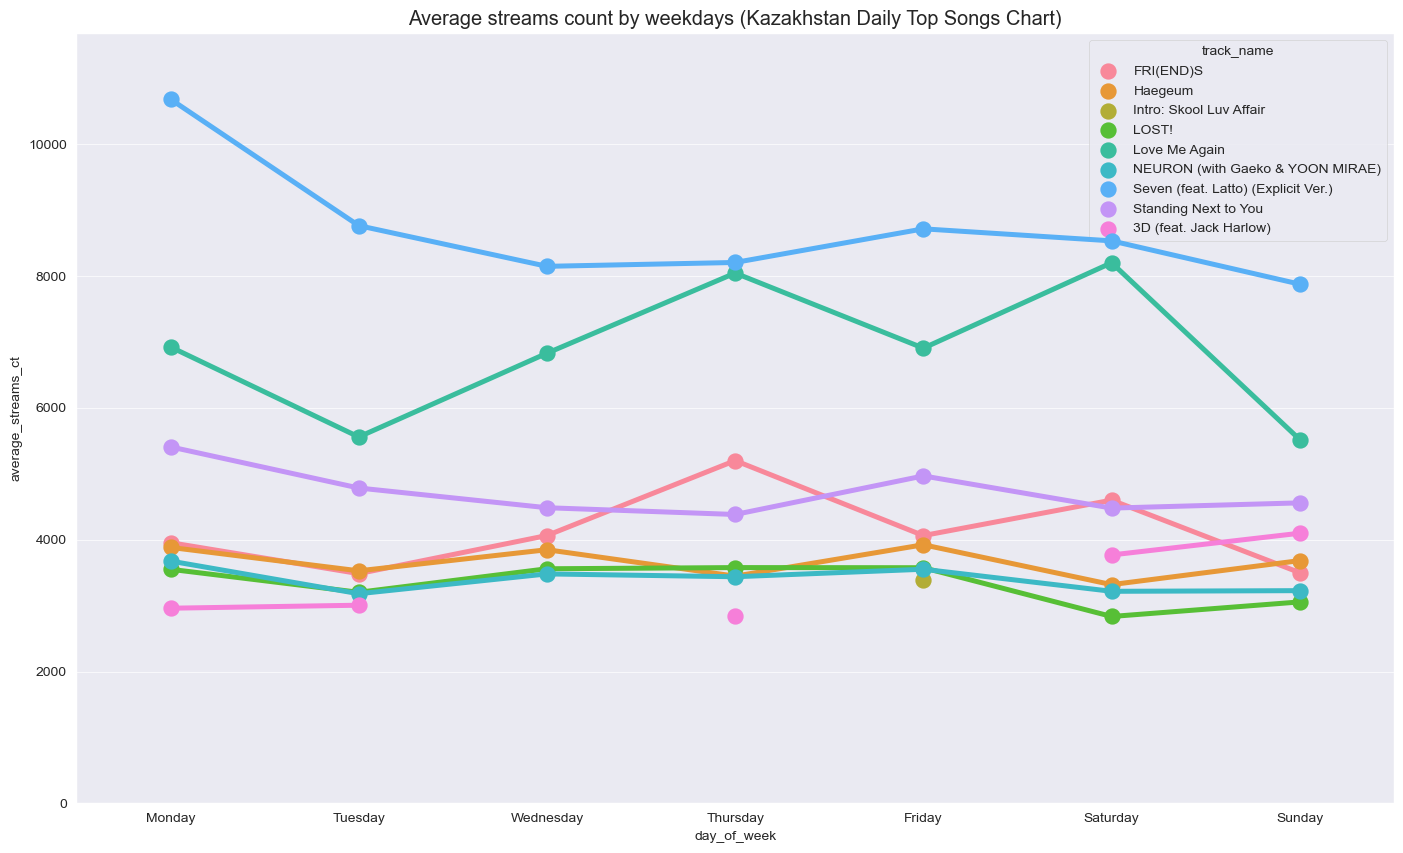

In [124]:
avg_streams_dow(bts.loc[~dtc['artist_names'].str.contains('Jimin')])

Seems like stream count ususally is high on Mondays and before weekends.

Is it a common dynamic for all users?

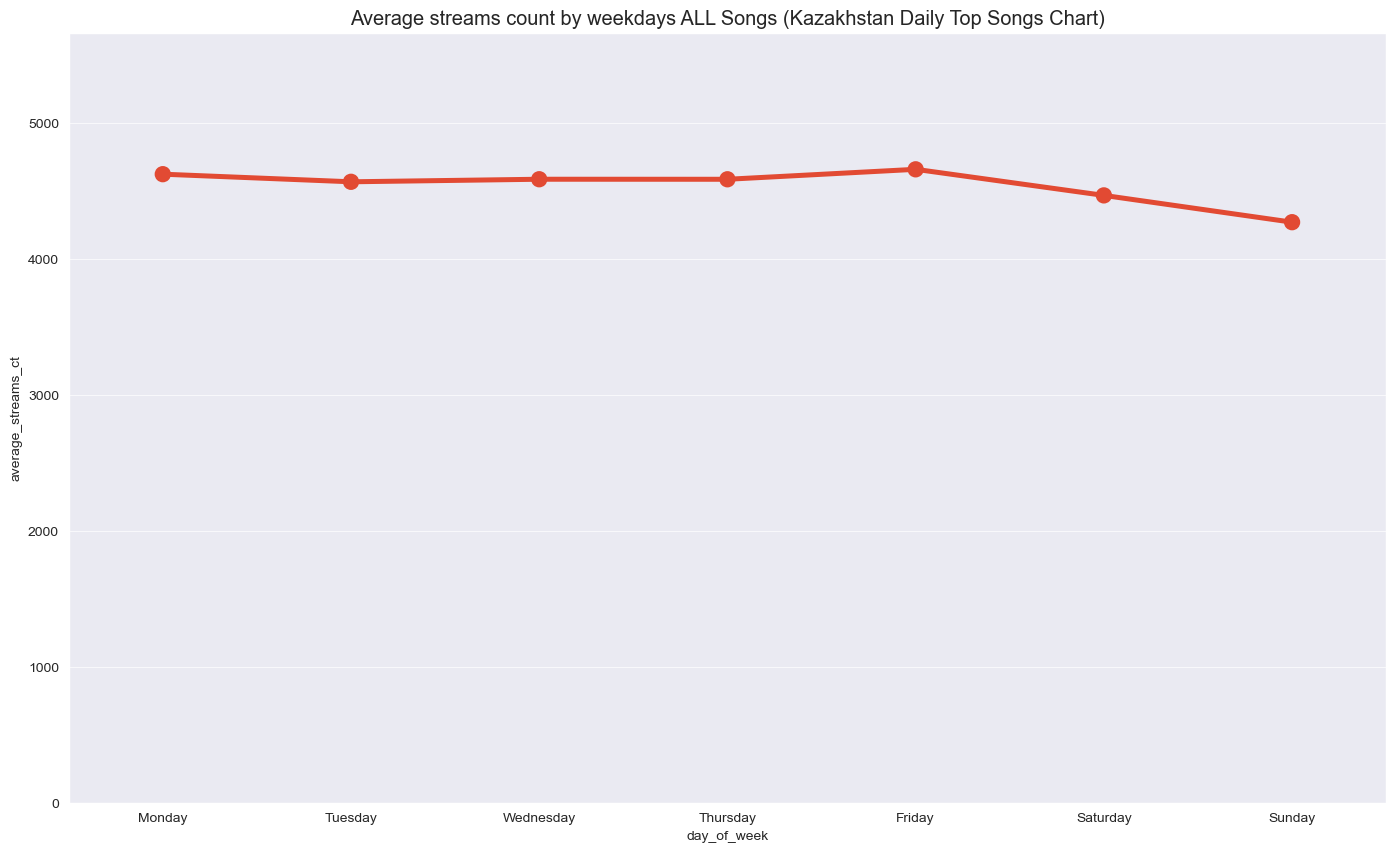

In [128]:
dtc['day_of_week'] = pd.to_datetime(dtc['dt']).dt.day_name()
agg = dtc.groupby(['day_of_week']).agg({'streams':'mean'})\
                                  .reset_index()\
                                  .rename(columns={'streams':'average_streams_ct'})
m = max(agg['average_streams_ct'])
plt.figure(figsize=(17, 10))
sns.pointplot(data = agg
                      , x='day_of_week', y='average_streams_ct', order=["Monday", "Tuesday", "Wednesday",
                                                                                         "Thursday", "Friday", "Saturday",
                                                                                         "Sunday"])
plt.title('Average streams count by weekdays ALL Songs (Kazakhstan Daily Top Songs Chart)')
plt.ylim(0,m+1000)
plt.show()

The drop of streams during weekends looks like a common pattern for users.

<hr>

## Ranks in chart

Let's see which were the highest ranks in chart for BTS and solo songs in August

In [134]:
bts.groupby(['artist_names', 'track_name']).agg({'rank':'min'})\
    .reset_index()\
    .rename(columns={'rank':'peak_in_august'})\
    .sort_values(by='peak_in_august')

,artist_names,track_name,peak_in_august
3,Jimin,Who,1
2,Jimin,Be Mine,2
7,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),2
10,V,Love Me Again,5
4,"Jimin, Loco",Smeraldo Garden Marching Band (feat. Loco),19
5,Jung Kook,Standing Next to You,20
9,V,FRI(END)S,32
6,"Jung Kook, Jack Harlow",3D (feat. Jack Harlow),36
0,Agust D,Haegeum,68
8,RM,LOST!,90


The fact that the only group release that made it to the chart is a song from 2014.. :)


## Days on chart

Let's see how many days in August have these songs spent in Daily Top Songs Chart.

In [161]:
bts.groupby(['artist_names', 'track_name']).agg({'dt':'nunique'})\
    .reset_index()\
    .rename(columns={'dt':'days_in_chart_in_Aug24'})\
    .sort_values(by='days_in_chart_in_Aug24', ascending=False)

,artist_names,track_name,days_in_chart_in_Aug24
2,Jimin,Be Mine,31
3,Jimin,Who,31
5,Jung Kook,Standing Next to You,31
7,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),31
10,V,Love Me Again,31
9,V,FRI(END)S,29
0,Agust D,Haegeum,13
6,"Jung Kook, Jack Harlow",3D (feat. Jack Harlow),13
11,"j-hope, Gaeko, YOON MIRAE",NEURON (with Gaeko & YOON MIRAE),12
4,"Jimin, Loco",Smeraldo Garden Marching Band (feat. Loco),10


Almost half of the songs spent in chart all month - and only two of those songs are fresh releases!

<hr>

Interesting to see the positions of some of the top songs throughout the month:

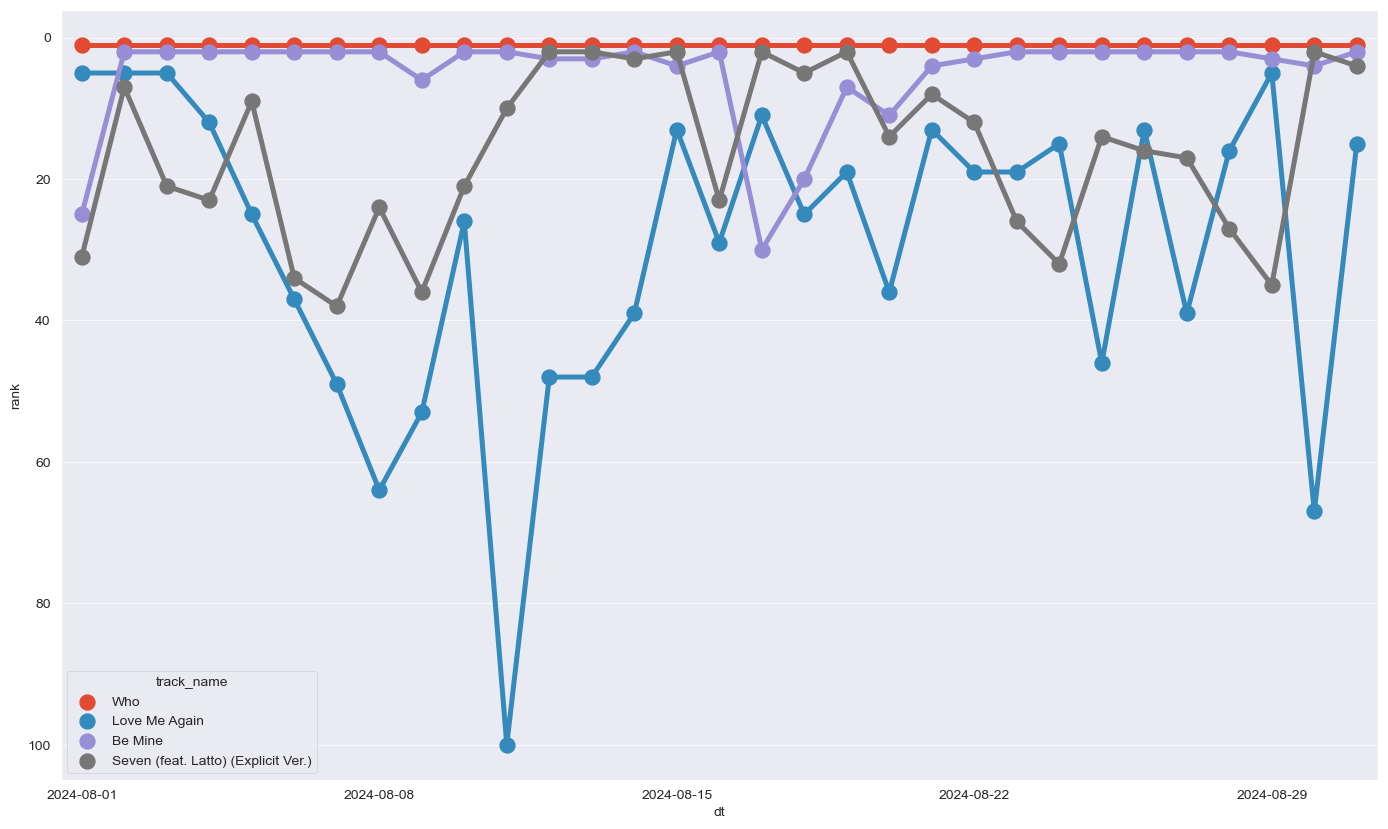

In [164]:
plt.figure(figsize=(17, 10))
ax = sns.pointplot(data = bts.loc[bts['track_name'].isin(['Be Mine', 'Who',
                                                        'Seven (feat. Latto) (Explicit Ver.)', 'Love Me Again'
                                                        ])], x='dt', y='rank', hue='track_name')
ax.set_xticks(ax.get_xticks()[::7])
ax.invert_yaxis()
plt.show()

"Who" stayed #1 during the whole month while three other top songs went up and down. 

<hr>

<hr>

## Conclusion

During this short analysis we dived into Daily Top Songs Chart Kazakhstan and explored BTS and members' songs positions and stream count.


The most streamed out of selected songs is the title track of "Muse" album - "Who" by Jimin. It has been on the first place for the whole month. And also gained the largest count of daily streams in Kazakhstan.

We discovered that it's eventually a typical pattern that streams drop during weekends and rise on Monday.

It's also a pleasure to see so many songs by BTS members presented in Daily Top Songs Chart!

I'm looking forward to exploring more Spotify and other streaming platforms data later.